<a href="https://colab.research.google.com/github/akshat0522/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**    - Akshat Mishra

# **Project Summary -**

### **Introduction**
Yes Bank, a prominent player in the Indian financial sector, has been a focal point in the news since 2018 due to a high-profile fraud case involving Rana Kapoor. This event has had a significant impact on the bank's stock prices, making it an intriguing subject for financial analysis and prediction. The primary goal of this project is to predict Yes Bank's monthly closing stock price using a linear regression model.<br>
### **Dataset**
We have used the yes bank stock price dataset. This dataset contains 5 different features that can be used for predicting close price of the stock. These features are -
1. Date
2. Open
3. High
4. Low
5. Close

### **Objective**
The main objective of this project is to predict the stocks' closing price for each month using a linear regression model.
### **Methodology**
1. Data Preparation and Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Selection
4. Modeling
5. Evaluation

### **Conclusion**
The project aims to demonstrate the applicability of Linear Regression model in financial forcasing.







# **GitHub Link -**

https://github.com/akshat0522/Yes-Bank-Stock-Closing-Price-Prediction

# **Problem Statement**


**Yes Bank, a significant entity in the Indian financial sector, has experienced notable fluctuations in its stock prices, particularly since 2018 due to a high-profile fraud case involving its founder, Rana Kapoor. These fluctuations pose a challenge for investors and analysts aiming to predict future stock prices accurately. The objective of this project is to develop a predictive model that can forecast the monthly closing stock price of Yes Bank.**

**The main goal is to determine whether a linear regression model can effectively predict the closing stock prices of Yes Bank, thus providing valuable insights and potential forecasting tools for investors and financial analysts.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4 : Machine Learning/Capstone Project Regression/data_YesBank_StockPrices.csv')

### Dataset First View

In [4]:
# Dataset First Look
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [6]:
# Detaset Statistics
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


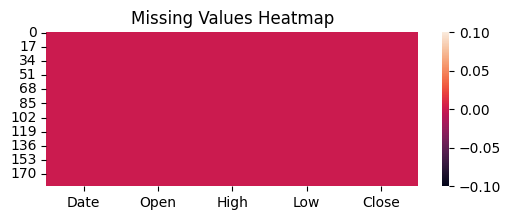

In [10]:
# Visualizing the missing values
plt.figure(figsize=(6, 2))
sns.heatmap(data.isnull())
plt.title('Missing Values Heatmap')
plt.show()

**The absence of color variation in the heatmap indicates that there are no null values in the DataFrame. All values are present, which is why the entire heatmap shows a uniform color.**

### What did you know about your dataset?

### Insights from the info() method -
*   The DataFrame has no missing values (nulls) in any of the columns, which means we don't to treat missing values.
*   The "Date column" contains data in an object format, which suggests it might need to be converted to a datetime format for analysis.
*   The other columns (Open, High, Low, Close) are numerical which are suitable for stock price analysis.

### Insights from the describe() method -
*   The data for all columns showing a wide range, and standard deviation is also high which means there is high valatility in the prices.
*   As the mean is higher than the median for all columns, which suggest a skew in the data distribution.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [12]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

**There are 5 variables -**
1. **Date** - Date of the record. Data type is object need to change into datetime.
2. **Open** - opening price of the share/stock (Numerical)
3. **High** - Highest price of the share for that day (Numerical)
4. **Low** - Lowest Price of the share for that day (Numerical)
5. **Close** - Closing price of the share for that day (Numerical)

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
data.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Converting datatype of 'Date' column from string to datetime.
data['Date'] = pd.to_datetime(data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [15]:
# Checking if the 'Date' column looks different from earlier
data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [16]:
# Checking the Datatype of the 'Date' Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [17]:
# Extracting year from 'Date' column and creating a seperate column for Year
data['Year'] = data['Date'].dt.year

In [18]:
# Extracting month from 'Date' column and creating a seperate column for Month
data['Month'] = data['Date'].dt.month

In [19]:
# Checking for the new column 'Year'
data.head()

,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11


In [20]:
# Defining Dependent & Independent variables for further implementations
dependent_variable = 'Close'
independent_variables = ['Open', 'High', 'Low']

### What all manipulations have you done and insights you found?



*   I have changed datatype of 'Date' column from string to datetime.
*   Extracted the year & month from date column and created a new column named 'Year' & 'Month' for future needs.
*   Divided the columns in independent and dependent variables for further implementations.
*   There are no null values and duplicate values. Data is clean and ready for vizualization. Mean is higher in numerical columns which indicate possibility of skewness in the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Distribution of 'Open' Variable)

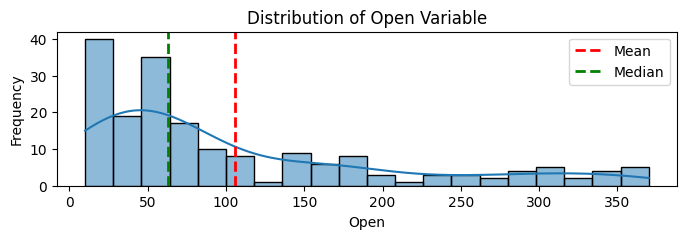

In [21]:
# Chart - 1 Visualization Code
# Distribution of 'Open' Variable along with mean and median line
plt.figure(figsize=(8, 2))
sns.histplot(data['Open'], bins=20, kde=True)

plt.axvline(data['Open'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['Open'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('Distribution of Open Variable')
plt.xlabel('Open')
plt.ylabel('Frequency')
plt.legend()
plt.show()

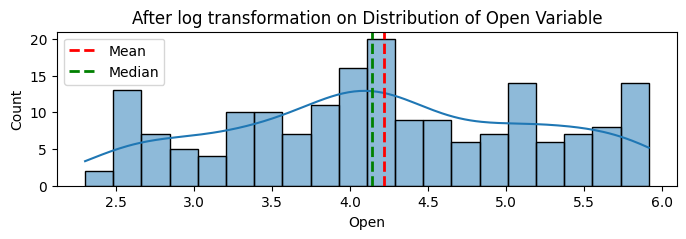

In [22]:
# Applying log transformation because it has right skewed distribution.
plt.figure(figsize=(8, 2))
sns.histplot(np.log(data['Open']), bins=20, kde=True)

plt.axvline(np.log(data['Open']).mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.log(data['Open']).median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('After log transformation on Distribution of Open Variable')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of 'Open' Variable

##### 2. What is/are the insight(s) found from the chart?

I came to know that Distrubution is skewed and needs transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After log transformation, the distribution has become close to normal distribution. Which will be required for a good model.

#### Chart - 2 (Distribution of 'Close' Variable)

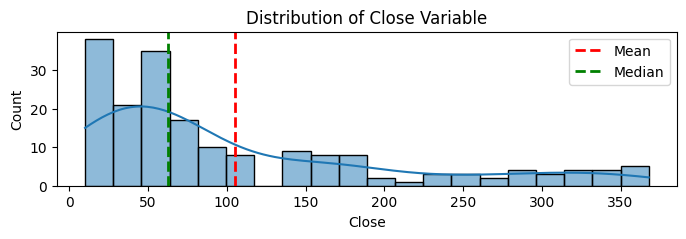

In [23]:
# Chart - 2 visualization code
# Distribution of 'Close' Variable along with mean and median line
plt.figure(figsize=(8, 2))
sns.histplot(data['Close'], bins=20, kde=True)

plt.axvline(data['Close'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['Close'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('Distribution of Close Variable')
plt.legend()
plt.show()

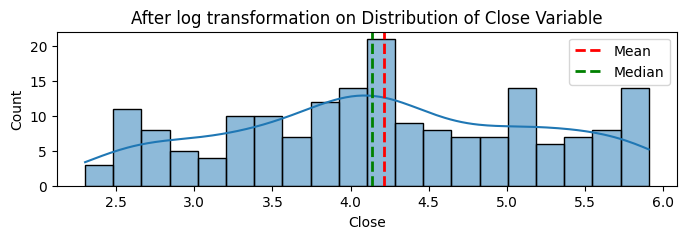

In [24]:
# Applying log transformation because of the skewness in the distribution.
plt.figure(figsize=(8, 2))
sns.histplot(np.log(data['Close']), bins=20, kde=True)

plt.axvline(np.log(data['Close']).mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.log(data['Close']).median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('After log transformation on Distribution of Close Variable')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of 'Close' Variable

##### 2. What is/are the insight(s) found from the chart?

I came to know that Distrubution is skewed and needs transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After log transformation, the distribution has become close to normal distribution, which will be required for a good model.

#### Chart - 3 (Distribution of 'High' Variable)

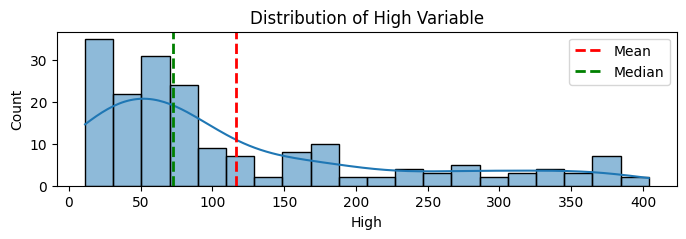

In [25]:
# Chart - 3 visualization code
# Distribution of 'High' Variable along with mean and median line
plt.figure(figsize=(8, 2))
sns.histplot(data['High'], bins=20, kde=True)

plt.axvline(data['High'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['High'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('Distribution of High Variable')
plt.legend()
plt.show()

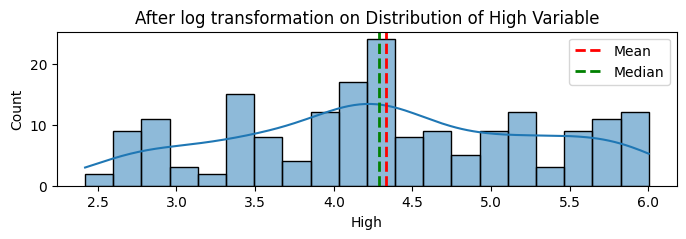

In [26]:
# Applying log transformation to the above distribution as i can see some skewness in the data
plt.figure(figsize=(8, 2))
sns.histplot(np.log(data['High']), bins=20, kde=True)

plt.axvline(np.log(data['High']).mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.log(data['High']).median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('After log transformation on Distribution of High Variable')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of 'High' Variable

##### 2. What is/are the insight(s) found from the chart?

I came to know that Distrubution is skewed and needs transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After log transformation, the distribution has become close to normal distribution, which will be required for a good model.

#### Chart - 4 (Distribution of 'Low' Variable)

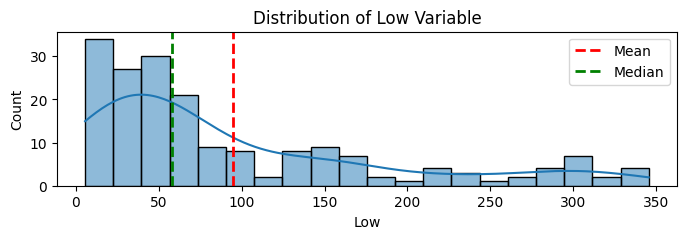

In [27]:
# Chart - 4 visualization code
# Distribution of 'Low' Variable along with Mean & Median Line
plt.figure(figsize=(8, 2))
sns.histplot(data['Low'], bins=20, kde=True)

plt.axvline(data['Low'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['Low'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('Distribution of Low Variable')
plt.legend()
plt.show()

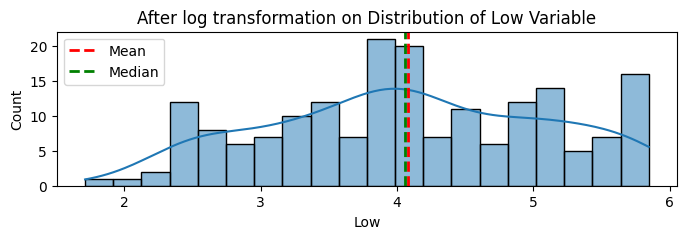

In [28]:
# Applying log transformation to the above distribution as there is some skewness in the data
plt.figure(figsize=(8, 2))
sns.histplot(np.log(data['Low']), bins=20, kde=True)

plt.axvline(np.log(data['Low']).mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.log(data['Low']).median(), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('After log transformation on Distribution of Low Variable')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of 'Low' Variable

##### 2. What is/are the insight(s) found from the chart?

Distrubution is skewed and needs transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After log transformation, the distribution has become close to normal distribution, which will be required for a good model.

#### Chart - 5 (Box Plots for Price data)

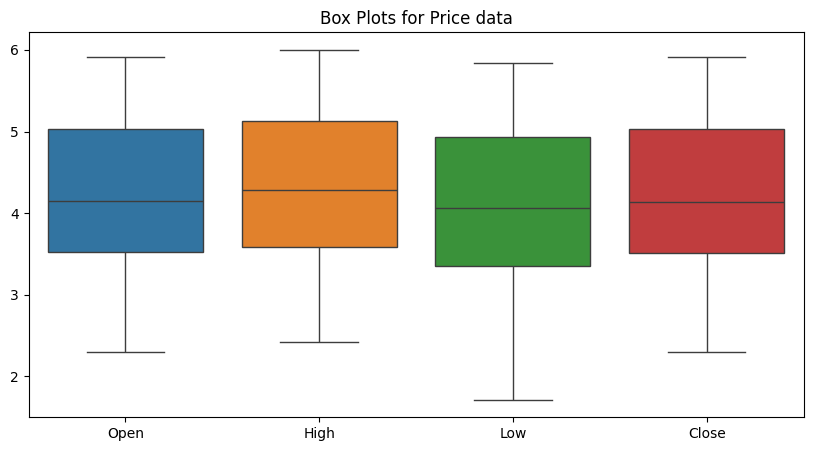

In [29]:
# Chart - 5 visualization code
# Box plot for price data
plt.figure(figsize=(10, 5))
sns.boxplot(data=np.log(data[['Open', 'High', 'Low', 'Close']]))
plt.title('Box Plots for Price data')
plt.show()

##### 1. Why did you pick the specific chart?

To check if there are outliers exists or not in the data.

##### 2. What is/are the insight(s) found from the chart?

After applying log transformation, outliers appeared to be normalised.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Outliers are not present in the data, this helps for a good model, however for a small dataset, it is also not advisable to completely remove outliers.

#### Chart - 6 (Relation between 'Open' and Dependent Variable 'Close')

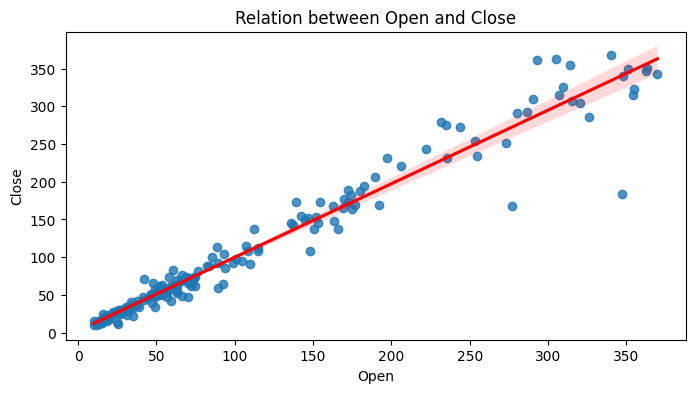

In [30]:
# Chart - 6 visualization code
# Visualising the relation between 'Open' and Dependent Variable 'Close' using Reg plot
plt.figure(figsize=(8, 4))
sns.regplot(x='Open', y='Close', data=data, line_kws=dict(color='red'))
plt.title('Relation between Open and Close')
plt.show()

##### 1. Why did you pick the specific chart?

Regplot is very good to visualize linear relation between two variables. We used it to check for the relation between 'Open' and 'Close'.

##### 2. What is/are the insight(s) found from the chart?

It seems that variable 'Open' and dependent variable 'Close' are linearly corelated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the strong linear corelation, we can say that it linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 7 (Relation between 'High' and Dependent Variable 'Close')

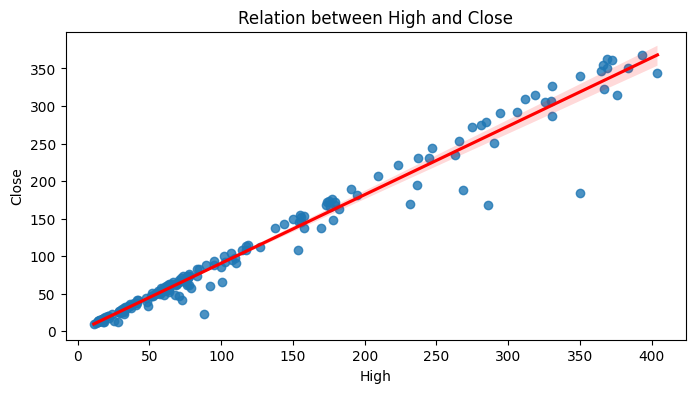

In [31]:
# Chart - 7 visualization code
# Visualising the relation between 'High' and Dependent Variable 'Close' using Reg plot
plt.figure(figsize=(8, 4))
sns.regplot(x='High', y='Close', data=data, line_kws=dict(color='red'))
plt.title('Relation between High and Close')
plt.show()

##### 1. Why did you pick the specific chart?

Regplot is very good to visualize linear relation between two variables.

##### 2. What is/are the insight(s) found from the chart?

It seems that variable 'High' and dependent variable 'Close' are linearly corelated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the strong linear corelation, we can say that it linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 8 (Relation between 'Low' and Dependent Variable 'Close')


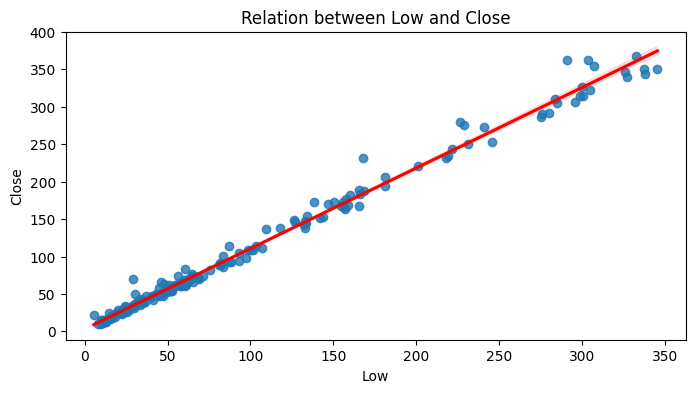

In [32]:
# Chart - 8 visualization code
# Visualising the relation between 'Low' and Dependent Variable 'Close' using Reg plot
plt.figure(figsize=(8, 4))
sns.regplot(x='Low', y='Close', data=data, line_kws=dict(color='red'))
plt.title('Relation between Low and Close')
plt.show()

##### 1. Why did you pick the specific chart?

Regplot is very good to visualize linear relation between two variables.

##### 2. What is/are the insight(s) found from the chart?

It seems that variable 'Low' and dependent variable 'Close' are linearly corelated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the strong linear corelation, we can say that it linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 9 (Yearly trend of Closing Price)

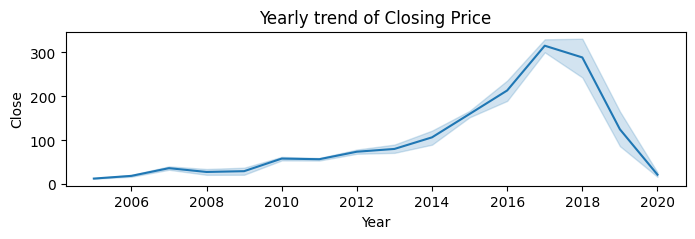

In [33]:
# Chart - 9 visualization code
# Visualization of closing price trend during all the years
plt.figure(figsize=(8, 2))
sns.lineplot(x='Year', y='Close', data=data)
plt.title('Yearly trend of Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

To check the trend of closing price during all these years.

##### 2. What is/are the insight(s) found from the chart?

*   Stock price is increasing till 2018.
*   After 2018 price is decreased at very high rate.
*   We can say something happened in 2018 which impected the stock price negatively.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As mentioned in problem statement that some high profile fraud case happened in 2018, which may have impected the business negatively, which we can also be seen in above visualization.

#### Chart - 10 (1 Day Moving Average of Close Price)

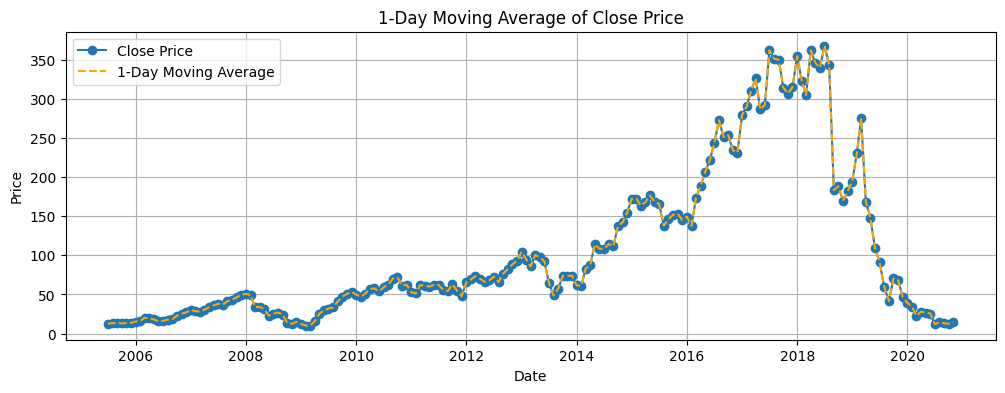

In [34]:
# Chart - 10 visualization code
# Visualization for 1 Day Moving Average
plt.figure(figsize=(12, 4))
plt.plot(data['Date'], data['Close'], label='Close Price', marker='o')
plt.plot(data['Date'], data['Close'].rolling(window=1).mean(), label='1-Day Moving Average', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('1-Day Moving Average of Close Price')
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

To check the 1 Day moving Average

##### 2. What is/are the insight(s) found from the chart?

I found that price was keep increasing till 2018 and suddenly started to go down. But increased a little between 2018 and 2020 and again went down.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The social news impacted the stock price negatively. And i was steadily showed growth till 2018 and was highly volatile after 2018.

#### Chart - 11 (1 Day Candle Stick Chart Over the period)

In [35]:
# Installation of Required library for Candle Stick Chart
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.3 MB/s eta 0:00:00


In [36]:
# Importing library required for candle stick pattern chart
import mplfinance as mpf

In [37]:
# Setting Date as Index
data.set_index('Date', inplace=True)

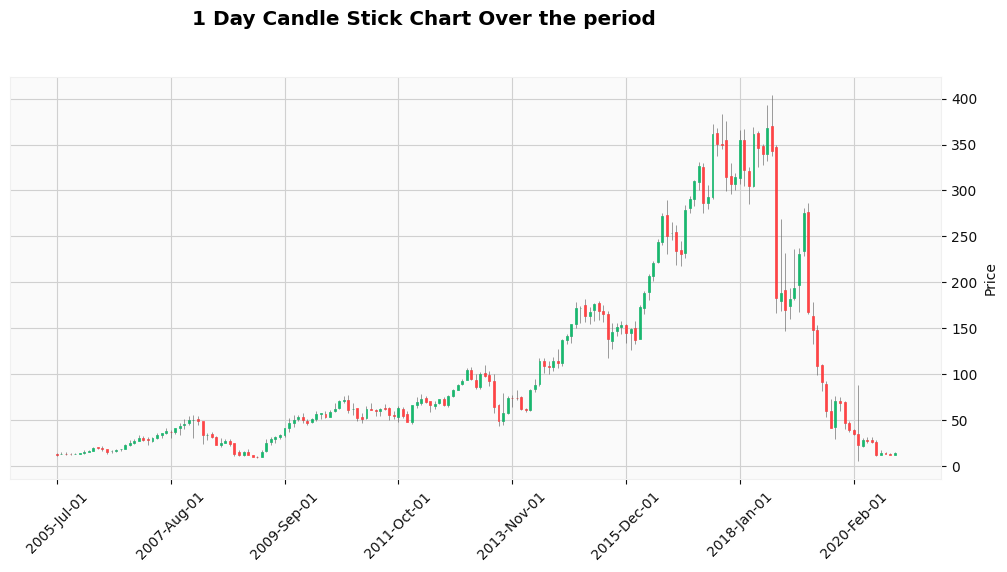

In [38]:
# Chart - 11 visualization code
# Visualization for candle stick chart of price over the period

mpf.plot(data[['Open', 'High', 'Low', 'Close']], type='candle', figratio=(9, 4) , style='yahoo' , title='1 Day Candle Stick Chart Over the period')

##### 1. Why did you pick the specific chart?

This is a widely used chart for stocks to get the idea of the volatility in the data, thats why we used it.

##### 2. What is/are the insight(s) found from the chart?

Except 2018 , there is not much veriation in the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ii is important to make sure that there is no huge variation in the data.

#### Chart - 12 ('nth Day Close' vs. 'n+1th Day Open')

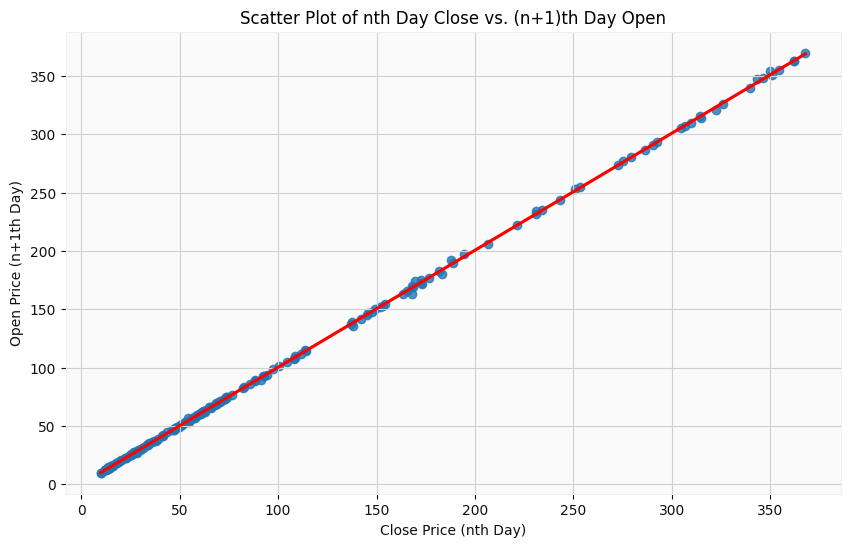

In [39]:
# Chart - 12 visualization code

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=data['Close'], y=data['Open'].shift(-1), data=data, line_kws=dict(color='red'))

# Adding labels and title
plt.title('Scatter Plot of nth Day Close vs. (n+1)th Day Open')
plt.xlabel('Close Price (nth Day)')
plt.ylabel('Open Price (n+1th Day)')

# Show plot
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

<ipython-input-40-dc7e4914a98f>:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  Year_prices_df = data.groupby('Year').aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})
<ipython-input-40-dc7e4914a98f>:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  Year_prices_df = data.groupby('Year').aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})


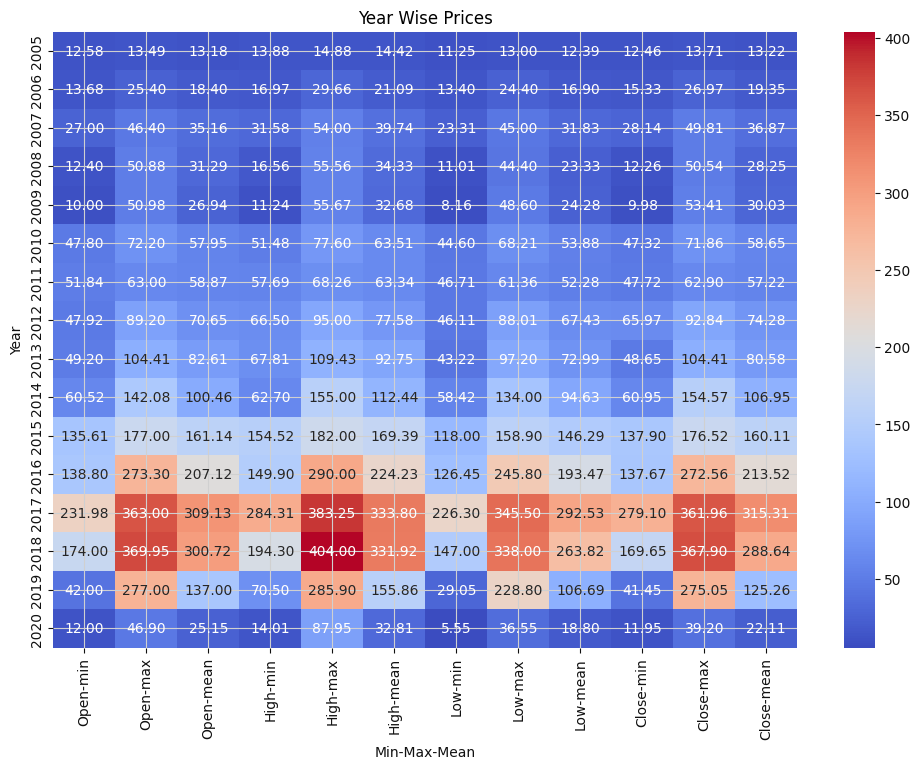

In [40]:
# Chart - 13 visualization code
Year_prices_df = data.groupby('Year').aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})
plt.figure(figsize = (12,8))
sns.heatmap(Year_prices_df , annot = True, cmap = 'coolwarm', fmt='.2f')
plt.xlabel('Min-Max-Mean')
plt.ylabel('Year')
plt.title('Year Wise Prices')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

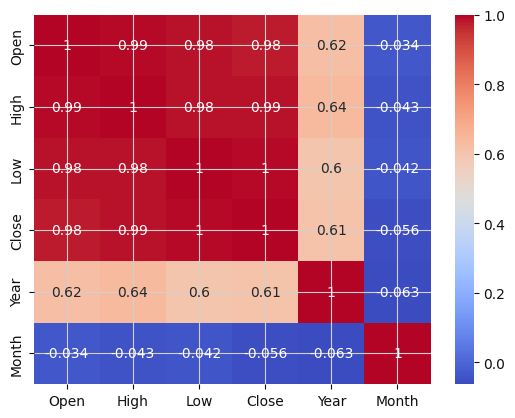

In [79]:
# Correlation Heatmap visualization code
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

To visualize the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

*   Clossing price has very strong corellation with open, high and low variable.
*   Also we can see multicollinearity here because independent variables are also strongly co-related with eachother.

#### Chart - 15 - Pair Plot

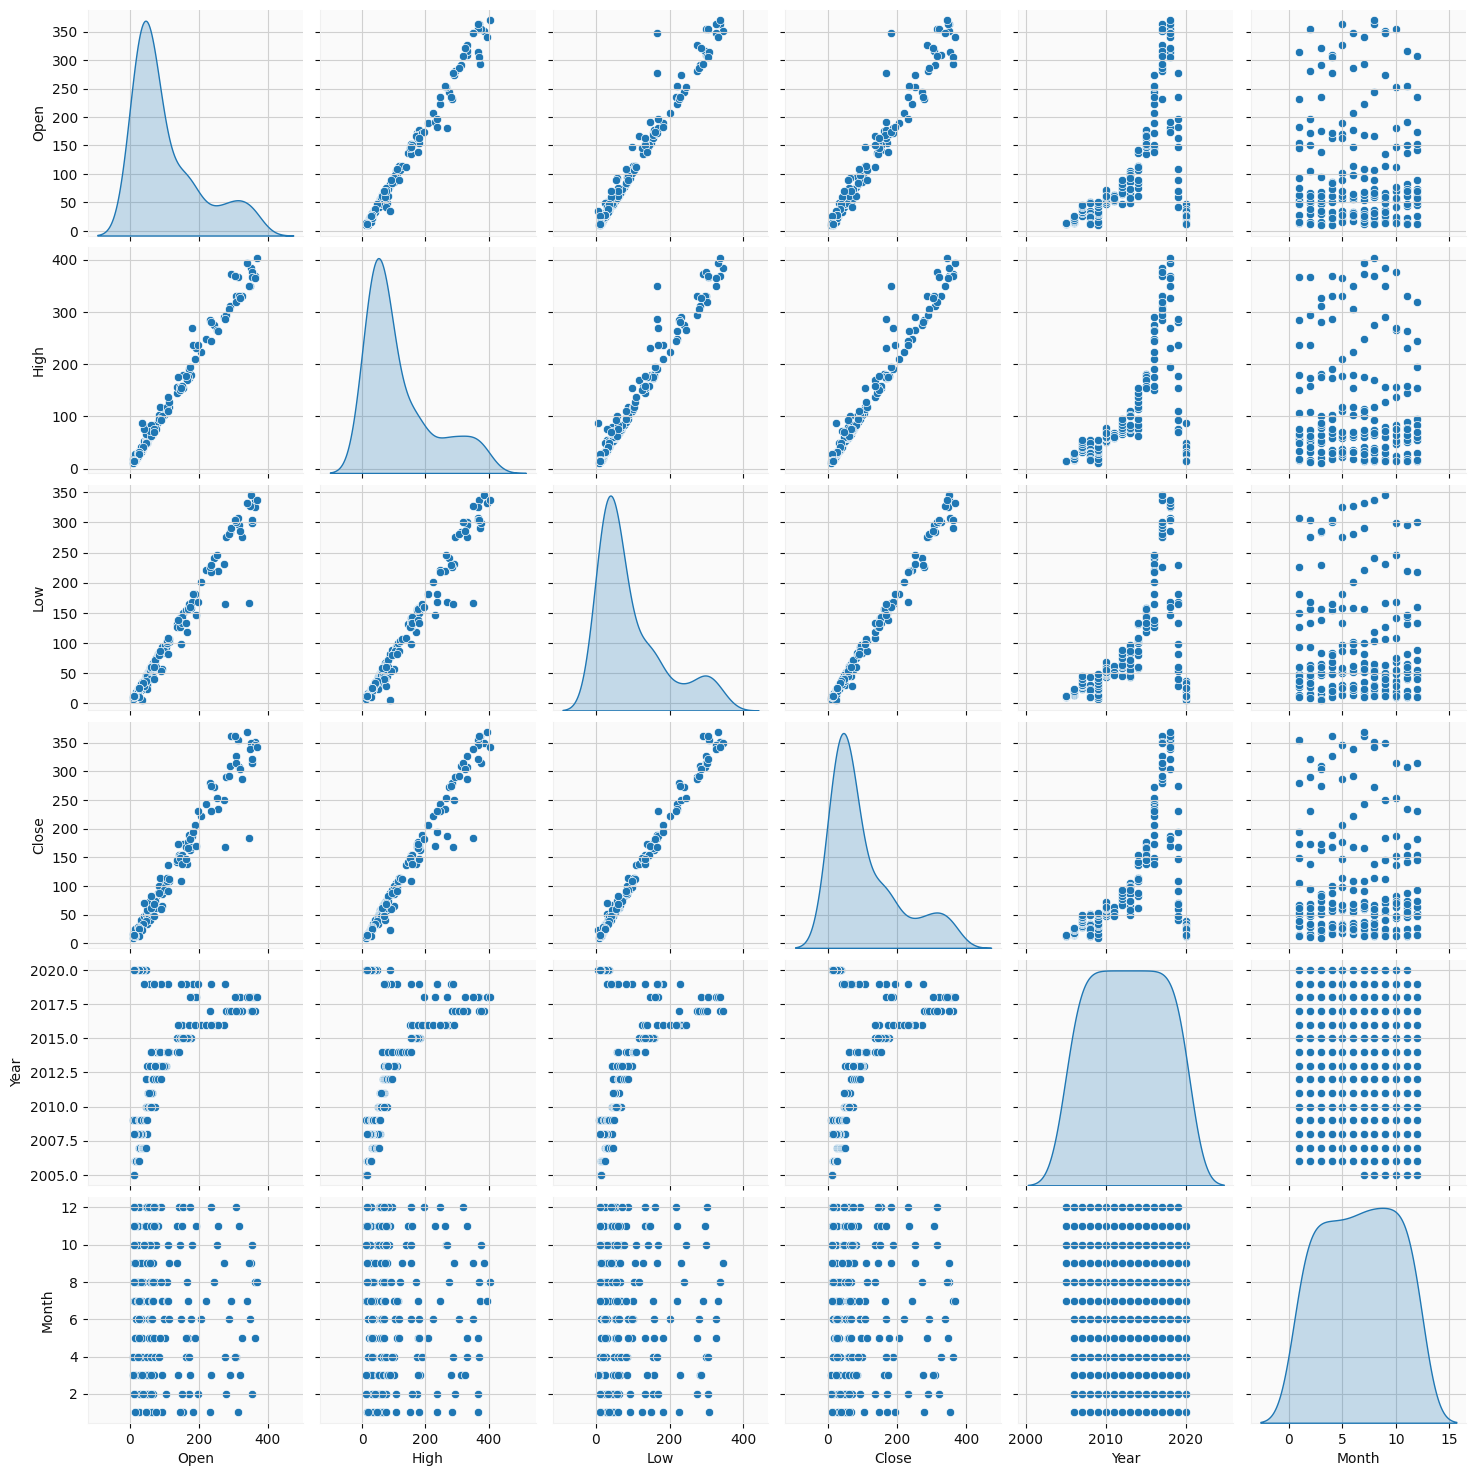

In [78]:
# Pair Plot visualization code
sns.pairplot(data, diag_kind='kde')

##### 1. Why did you pick the specific chart?

To analyse the patterns of data and realationship between the features.
Its good to visualise because here we get both scatter plot & distribution together. It's almost same as the correlation map but here we get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Open, Close, Low and High variables are having skewed distribution and showing strong linear relationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [48]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [49]:
# Expand Contraction

#### 2. Lower Casing

In [50]:
# Lower Casing

#### 3. Removing Punctuations

In [51]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [52]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [53]:
# Remove Stopwords

In [54]:
# Remove White spaces

#### 6. Rephrase Text

In [55]:
# Rephrase Text

#### 7. Tokenization

In [56]:
# Tokenization

#### 8. Text Normalization

In [57]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [58]:
# POS Taging

#### 10. Text Vectorization

In [59]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [60]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [61]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [62]:
# Transform Your data

### 6. Data Scaling

In [63]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [64]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [65]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [66]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [67]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [72]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [75]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [76]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***